**ELEVATE LABS AI/ML INTERNSHIP TASK 4**

*📓 Task 4: Classification with Logistic Regression*

`Import Libraries`

In [28]:
# ----------------------------------------------------------
# 1. IMPORT LIBRARIES
# ----------------------------------------------------------
# - pandas / numpy: for data manipulation
# - matplotlib.pyplot: for plotting
# - seaborn: for optional visualization styling
# - sklearn.model_selection: train_test_split
# - sklearn.preprocessing: StandardScaler
# - sklearn.linear_model: LogisticRegression
# - sklearn.metrics: confusion_matrix, classification_report, roc_curve, auc, etc.
# ----------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)

`Load Dataset`

In [29]:
# ----------------------------------------------------------
# 2. LOAD DATASET
# ----------------------------------------------------------
# We will use scikit-learn’s built-in Breast Cancer Wisconsin (Diagnostic) dataset.
# This dataset has:
#   - 569 samples
#   - 30 numeric features (tumor measurements)
#   - Target: 0 = benign, 1 = malignant
# ----------------------------------------------------------

data = load_breast_cancer(as_frame=True)
df = data.frame.copy()  # Contains features + 'target' column
# Rename 'target' to 'diagnosis' for clarity
df.rename(columns={'target': 'diagnosis'}, inplace=True)

# Confirm load
print("Dataset loaded. Shape:", df.shape)
print("Feature columns:", df.columns[:-1].tolist(), "\n")
print("Sample of data:")
display(df.head())


Dataset loaded. Shape: (569, 31)
Feature columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension'] 

Sample of data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


`Intial Inspection of Dataset`

In [30]:
# ----------------------------------------------------------
# 3. INITIAL INSPECTION
# ----------------------------------------------------------
# 3a. Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

# 3b. Examine class balance
print("\nClass distribution (diagnosis):")
print(df['diagnosis'].value_counts(), "\n")
print("Percentage benign vs. malignant:")
print(df['diagnosis'].value_counts(normalize=True) * 100)

# 3c. Quick statistical summary of features
print("Numeric summary (describe):")
display(df.describe().T)

Missing values per column:


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0



Class distribution (diagnosis):
diagnosis
1    357
0    212
Name: count, dtype: int64 

Percentage benign vs. malignant:
diagnosis
1    62.741652
0    37.258348
Name: proportion, dtype: float64
Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


`Define Features and Target`

In [31]:
# ----------------------------------------------------------
# 4. DEFINE FEATURES & TARGET
# ----------------------------------------------------------
# 4a. Separate X (features) and y (target)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 4b. Split into train and test sets
#     - test_size=0.2 → 20% of data for testing
#     - stratify=y → maintain target class proportions
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

print("After split:")
print("  X_train:", X_train.shape, "y_train:", y_train.shape)
print("  X_test: ", X_test.shape,  "y_test: ", y_test.shape)


After split:
  X_train: (455, 30) y_train: (455,)
  X_test:  (114, 30) y_test:  (114,)


`Feature Scaling (Standardization)`

In [32]:
# ----------------------------------------------------------
# 5. FEATURE SCALING ( STANDARDIZATION )
# ----------------------------------------------------------
# Logistic Regression converges faster and performs better when features are on the same scale.
# We fit the scaler on training data only, then apply to both train and test.

scaler = StandardScaler()

# Fit scaler on training features and transform
X_train_scaled = scaler.fit_transform(X_train)

# Use the same transformation on test features
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easy viewing (optional)
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns = X.columns,
    index   = X_train.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns = X.columns,
    index   = X_test.index
)

print("First 5 rows of scaled training data:")
display(X_train_scaled.head())


First 5 rows of scaled training data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
546,-1.072001,-0.658425,-1.088080,-0.939274,-0.135940,-1.008718,-0.968359,-1.102032,0.281062,-0.113231,...,-1.034094,-0.623497,-1.070773,-0.876534,-0.169982,-1.038836,-1.078995,-1.350527,-0.352658,-0.541380
432,1.748743,0.066502,1.751157,1.745559,1.274468,0.842288,1.519852,1.994664,-0.293045,-0.320180,...,1.228342,-0.092833,1.187467,1.104386,1.517001,0.249655,1.178594,1.549916,0.191078,-0.173739
174,-0.974734,-0.931124,-0.997709,-0.867589,-0.613515,-1.138154,-1.092292,-1.243358,0.434395,-0.429247,...,-0.973231,-1.036772,-1.008044,-0.834168,-1.097823,-1.167260,-1.282241,-1.707442,-0.307734,-1.213033
221,-0.145103,-1.215186,-0.123013,-0.253192,0.664482,0.286762,-0.129729,-0.098605,0.555635,0.029395,...,-0.251266,-1.369643,-0.166633,-0.330292,0.234006,0.096874,-0.087521,-0.344838,0.242198,-0.118266
289,-0.771617,-0.081211,-0.803700,-0.732927,-0.672282,-1.006099,-0.798502,-0.684484,0.737495,-0.457213,...,-0.801135,0.079230,-0.824381,-0.741830,-0.911367,-0.984612,-0.933190,-0.777604,0.555118,-0.761639


`Fit Logistic Regression Model`

In [33]:
# ----------------------------------------------------------
# 6. FIT LOGISTIC REGRESSION MODEL
# ----------------------------------------------------------
# We use solver='liblinear' (suitable for small datasets).
# Random state is set for reproducibility.

clf = LogisticRegression(solver='liblinear', random_state=42)
clf.fit(X_train_scaled, y_train)

# Confirm training accuracy
train_preds = clf.predict(X_train_scaled)
print("Training accuracy:", accuracy_score(y_train, train_preds))


Training accuracy: 0.989010989010989


`Model Evaluation and Performance Metrics`

In [34]:
# ----------------------------------------------------------
# 7. PREDICTIONS & EVALUATION ON TEST SET
# ----------------------------------------------------------

# 7a. Predict class labels on test data
y_pred = clf.predict(X_test_scaled)

# 7b. Predict class probabilities (probability of malignancy = class 1)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# 7c. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix (Test Set):")
print(cm)
print(f" True Negatives (benign correctly identified) : {tn}")
print(f" False Positives (benign incorrectly flagged)  : {fp}")
print(f" False Negatives (malignant missed)           : {fn}")
print(f" True Positives (malignant correctly flagged) : {tp}\n")

# 7d. Classification Report (precision, recall, f1-score)
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))

# 7e. Accuracy, Precision, Recall, F1 on test set
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")


Confusion Matrix (Test Set):
[[41  1]
 [ 1 71]]
 True Negatives (benign correctly identified) : 41
 False Positives (benign incorrectly flagged)  : 1
 False Negatives (malignant missed)           : 1
 True Positives (malignant correctly flagged) : 71

Classification Report (Test Set):
               precision    recall  f1-score   support

   Benign (0)       0.98      0.98      0.98        42
Malignant (1)       0.99      0.99      0.99        72

     accuracy                           0.98       114
    macro avg       0.98      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114

Accuracy : 0.9825
Precision: 0.9861
Recall   : 0.9861
F1 Score : 0.9861


`ROC Curve and AUC`

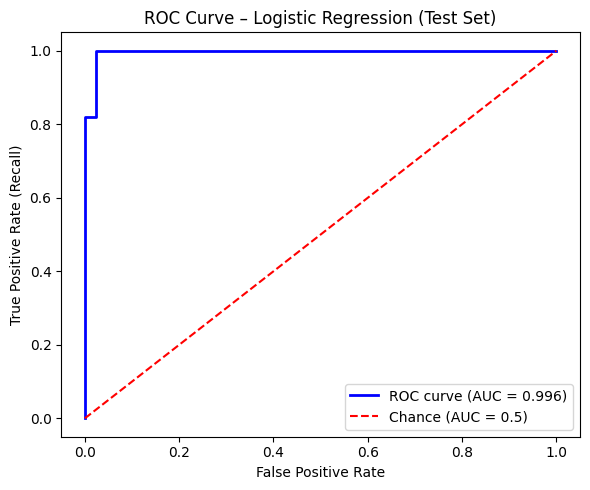

Area Under the Curve (AUC): 0.996


In [35]:
# ----------------------------------------------------------
# 8. ROC CURVE & AUC
# ----------------------------------------------------------

# Compute false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Chance (AUC = 0.5)')
plt.title("ROC Curve – Logistic Regression (Test Set)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

print(f"Area Under the Curve (AUC): {roc_auc:.3f}")


`Sigmoid Function Visualization`

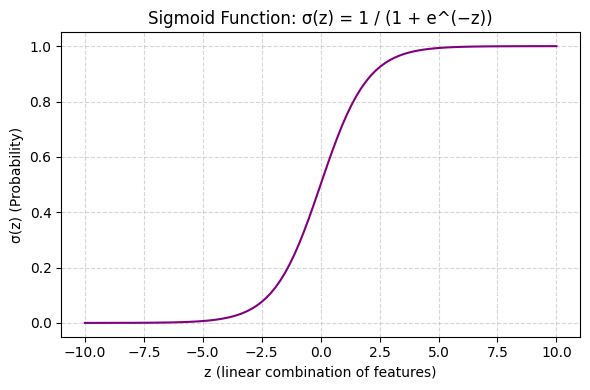

In [36]:
# ----------------------------------------------------------
# 10. SIGMOID FUNCTION VISUALIZATION
# ----------------------------------------------------------
# The logistic model outputs z = β0 + β1x1 + ...; then P = 1/(1 + e^(-z)).
# Visualize the sigmoid curve for z ∈ [−10, +10].

z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid, color='purple')
plt.title("Sigmoid Function: σ(z) = 1 / (1 + e^(−z))")
plt.xlabel("z (linear combination of features)")
plt.ylabel("σ(z) (Probability)")
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


`COefficient Interpretation and Odds Ratios`

In [38]:
# ----------------------------------------------------------
# 12. INTERPRET COEFFICIENTS & ODDS RATIOS
# ----------------------------------------------------------

# 12a. Extract feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': clf.coef_[0]
}).sort_values(by='Coefficient', key=lambda s: s, ascending=False)

print("Logistic Regression Coefficients (by magnitude):")
display(coef_df.head(10))

# 12b. Convert to Odds Ratios (OR = exp(coef))
coef_df['OddsRatio'] = np.exp(coef_df['Coefficient'])
coef_df.sort_values(by='OddsRatio', ascending=False, inplace=True)

print("\nTop Features by Odds Ratio:")
display(coef_df[['Feature','OddsRatio']].head(10))

# 12c. Interpretation example
top_feat = coef_df.iloc[0]
print(
    f"\nInterpretation: A one‐unit increase in '{top_feat['Feature']}' "
    f"multiplies the odds of being malignant by {top_feat['OddsRatio']:.2f}, "
    "holding all other features constant."
)


Logistic Regression Coefficients (by magnitude):


,Feature,Coefficient
5,mean compactness,0.660985
15,compactness error,0.650599
19,fractal dimension error,0.423388
18,symmetry error,0.349244
11,texture error,0.251621
9,mean fractal dimension,0.179213
16,concavity error,0.177227
25,worst compactness,0.049562
14,smoothness error,-0.164410
8,mean symmetry,-0.175127



Top Features by Odds Ratio:


,Feature,OddsRatio
5,mean compactness,1.936699
15,compactness error,1.916689
19,fractal dimension error,1.527127
18,symmetry error,1.417995
11,texture error,1.286108
9,mean fractal dimension,1.196276
16,concavity error,1.193902
25,worst compactness,1.050810
14,smoothness error,0.848394
8,mean symmetry,0.839351



Interpretation: A one‐unit increase in 'mean compactness' multiplies the odds of being malignant by 1.94, holding all other features constant.


`Final Model Save`

In [39]:
# ----------------------------------------------------------
# 13. SAVE FINAL MODEL (OPTIONAL)
# ----------------------------------------------------------
import joblib
joblib.dump(clf, 'logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl'.")


Model saved as 'logistic_regression_model.pkl'.
